In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1976
           1       1.00      1.00      1.00        70

    accuracy                           1.00      2046
   macro avg       1.00      1.00      1.00      2046
weighted avg       1.00      1.00      1.00      2046



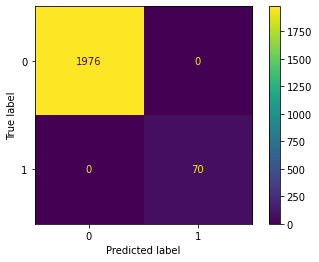

In [4]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Import data file with bankrupcy data 
bD = pd.read_csv("drive/MyDrive/data.csv")

# Target the bankruptcy section in our data set
target_feature = ['Bankrupt?']
# Get the features from our list
features = list(set(list(bD.columns))-set('Bankrupt?'))
# Format our input and output features
X = bD[features].values
y = bD['Bankrupt?'].values
y = np.ravel(y)

#normalize data
bD[features] = bD[features]/bD[features].max()

# Feed the data into a function which splits the data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40)
nodes = len(bD.columns)

# Set up a Random Forest Classifier model from numpy
model = RandomForestClassifier(n_estimators=100)
# Fit the model to the train input and its associated output
model.fit(X_train, y_train)
# Function which stores the prediction data
predict_test = model.predict(X_test)

# Set up the confusion matrix
cm = confusion_matrix(y_test, predict_test)
# Display confusion matrix
# Display the stats related to the model
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test, predict_test))


# New Section